# Aufgabenbearbeitung II - Datenvisualisierung (Lösungsansatz)
<br>
<br>
Hinweise: https://pandas.pydata.org/docs/user_guide/index.html

In [9]:
import pandas as pd  #Einfügen der Pandas-Bibliothek über die Abkürzung "pd"
import datetime      #um die Datentypen Datum und Zeit nutzen zu können

In [10]:
#df = pd.read_csv("euerPfad/Dateiname.csv", sep = ";") --> für Workshop
df = pd.read_csv("C:/Users/Rocky Telatko/Documents/RT/Python/IoT-Workshop_Woche/ProdTag_12_05_2021.csv", 
                 sep = ";")   #Einlesen der csv-Daten
df.head(n=10)   #Ausgabe der ersten 10 Zeilen des Datensatzes

,Produktvariante,Prozessschritt,Auftragsnummer,Prozessbeschreibung,Prozessnummer,Startdatum,Startzeit,Enddatum,Endzeit,Arbeitsstation,Transportzeit
0,8010,10,1329,release a defined part on stopper 1,212,12.05.2021,10:02:25,12.05.2021,10:02:40,5,0
1,8010,20,1329,feed part from magazin,200,12.05.2021,10:03:07,12.05.2021,10:03:09,11,27
2,8010,30,1329,assemble a PCB with one fuse left,302,12.05.2021,10:04:45,12.05.2021,10:06:28,8,6
3,8010,40,1329,feed part from magazin,200,12.05.2021,10:07:27,12.05.2021,10:07:30,6,63
4,8010,50,1329,pressing for time in seconds,110,12.05.2021,10:07:43,12.05.2021,10:07:45,7,14
5,8010,60,1329,store a part from stopper 2,211,12.05.2021,10:09:49,12.05.2021,10:10:01,5,1126
6,8010,10,1329,release a defined part on stopper 1,212,12.05.2021,10:02:43,12.05.2021,10:02:56,5,0
7,8010,20,1329,feed part from magazin,200,12.05.2021,10:03:23,12.05.2021,10:03:25,11,27
8,8010,30,1329,assemble a PCB with one fuse left,302,12.05.2021,10:06:35,12.05.2021,10:08:18,8,6
9,8010,40,1329,feed part from magazin,200,12.05.2021,10:09:28,12.05.2021,10:09:30,6,63


In [11]:
df["Zykluszeit"] = pd.to_datetime(df["Endzeit"]) - pd.to_datetime(df["Startzeit"])   #Berechnung der Zykluszeit je Prozessschritt
df["Zykluszeit"] = df["Zykluszeit"].dt.total_seconds()   #Umwandlung der Zykluszeit in Sekunden
df.head(n=5)

,Produktvariante,Prozessschritt,Auftragsnummer,Prozessbeschreibung,Prozessnummer,Startdatum,Startzeit,Enddatum,Endzeit,Arbeitsstation,Transportzeit,Zykluszeit
0,8010,10,1329,release a defined part on stopper 1,212,12.05.2021,10:02:25,12.05.2021,10:02:40,5,0,15.0
1,8010,20,1329,feed part from magazin,200,12.05.2021,10:03:07,12.05.2021,10:03:09,11,27,2.0
2,8010,30,1329,assemble a PCB with one fuse left,302,12.05.2021,10:04:45,12.05.2021,10:06:28,8,6,103.0
3,8010,40,1329,feed part from magazin,200,12.05.2021,10:07:27,12.05.2021,10:07:30,6,63,3.0
4,8010,50,1329,pressing for time in seconds,110,12.05.2021,10:07:43,12.05.2021,10:07:45,7,14,2.0


<AxesSubplot:xlabel='Arbeitsstation'>

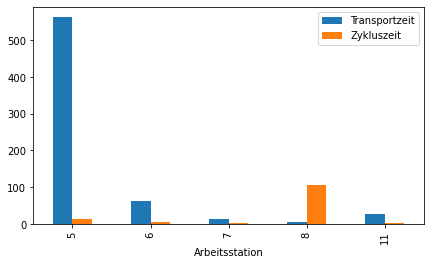

In [4]:
selectAS = df[["Arbeitsstation", "Transportzeit", "Zykluszeit"]]   #Selektieren des Datensatzes nach den beschriebenen Spalten
meanProzessDauerAS = selectAS.groupby("Arbeitsstation").mean()   #Gruppierung nach den Arbeitsstationen und ermitteln des Durchschnitts über die Werte
meanProzessDauerAS.plot(kind = "bar", figsize=(7, 4))   #Ausgabe der Durchschnittswerte der Transport- und Zykluszeiten als Balkendiagramm

array([<AxesSubplot:title={'center':'Transportzeit'}, xlabel='Arbeitsstation'>,
       <AxesSubplot:title={'center':'Zykluszeit'}, xlabel='Arbeitsstation'>],
      dtype=object)

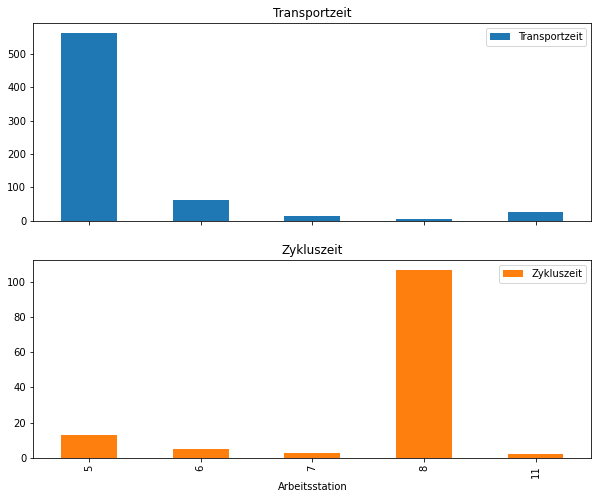

In [12]:
meanProzessDauerAS.plot.bar(subplots=True, figsize=(10, 8))   #Ausgabe der Durchschnittswerte der Transport- und Zykluszeiten als separate Balkendiagramme

<AxesSubplot:title={'center':'Durchschnittliche Gesamtzeit je Arbeitsstation'}, xlabel='Arbeitsstation', ylabel='Zeit in Sekunden'>

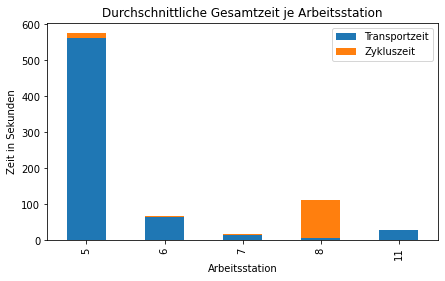

In [13]:
meanProzessDauerAS.plot.bar(stacked = True, figsize=(7, 4), 
                            xlabel = "Arbeitsstation", 
                            ylabel = "Zeit in Sekunden", 
                            title = "Durchschnittliche Gesamtzeit je Arbeitsstation")
#Ausgabe der Durchschnittswerte der Transport- und Zykluszeiten als gestapelte Balkendiagramme

<AxesSubplot:title={'center':'Zykluszeit'}, xlabel='[Produktvariante]'>

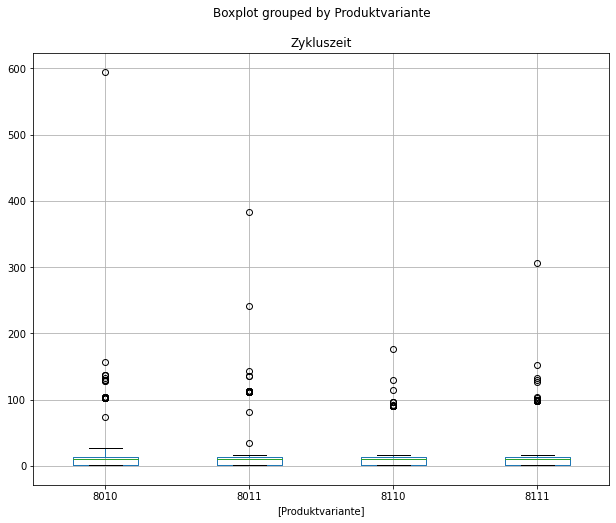

In [14]:
selectAS_PV = df[["Arbeitsstation", "Produktvariante", "Transportzeit", "Zykluszeit"]]   #Selektieren des Datensatzes nach den beschriebenen Spalten
selectAS_8 = selectAS_PV.loc[(df['Arbeitsstation'] == 8)]   #Filtern des vorselektierten Datensatzes nach Arbeitsstation 8
selectPV_ZZ_AS8 = df[["Produktvariante", "Zykluszeit"]]    #erneutes Selektieren des Datensatzes nach den beschriebenen Spalten
selectPV_ZZ_AS8.boxplot(by = "Produktvariante", figsize = (10, 8))   #Ausgabe als Boxplot - zum Aufzeigen der Schwankungen der Zykluszeiten der Produktvarianten an Arbeitsstation 8

Produktvariante
8010    AxesSubplot(0.125,0.125;0.775x0.755)
8011    AxesSubplot(0.125,0.125;0.775x0.755)
8110    AxesSubplot(0.125,0.125;0.775x0.755)
8111    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zykluszeit, dtype: object

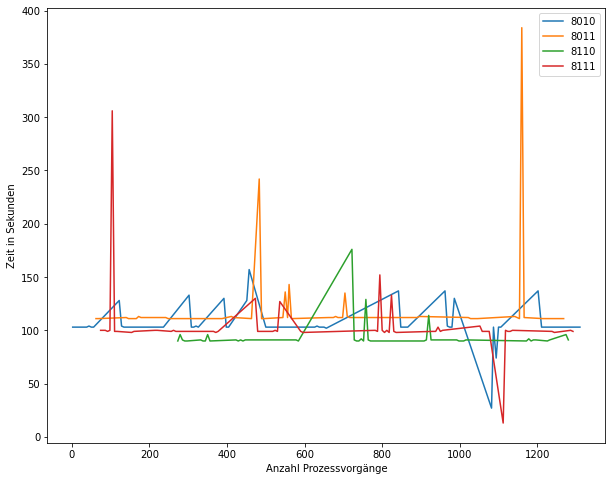

In [8]:
#Liniendiagramm (Zeitreihe) zum Aufzeigen der Schwankungen an AS 8, unterteilt nach Produktvarianten für die Zykluszeit
selectAS_PV = df[["Arbeitsstation", "Produktvariante", "Transportzeit", "Zykluszeit"]]   #Selektieren des Datensatzes nach den beschriebenen Spalten
selectAS_8 = selectAS_PV.loc[(df['Arbeitsstation'] == 8)]   #Filtern des vorselektierten Datensatzes nach Arbeitsstation 8
selectPV_ZZ_AS8 = selectAS_8[["Produktvariante", "Zykluszeit"]]   #erneutes Selektieren des Datensatzes nach den beschriebenen Spalten
selectPV_ZZ_AS8.groupby('Produktvariante')['Zykluszeit'].plot(xlabel = "Anzahl Prozessvorgänge",
                                                              ylabel = "Zeit in Sekunden",
                                                              legend=True, 
                                                              figsize = (10, 8)) #Gruppierung nach den Produktvarianten und plotten der Zykluszeit je Werkstück  

## Feedback für Verbesserung

- Vorbereitung verbessern --> damit sich Fehler, wie mit dem Datensatz, nicht wiederholen
- mehr bei der Aufgabenbearbeitung partizipieren, statt lediglich ab und an vorbeizuschauen
- mehr an bzw. mit der Modellfabrik arbeiten, so wie es in der Workshopbeschreibung formuliert war --> das Thema war sehr informatiklastig
- zu wenig Interdisziplinarität --> Aufgabe breiter aufstellen, damit mehrere Disziplinen einbezogen werden (nicht "nur" Informatik)
- Mehr Zeit für die Vorbereitung der Präsentation einplanen, um diese vorher nochmal durchzusprechen und Feedback zu geben


Anlegen einer Ordnerstruktur inkl. Ordner je Teilnehmenden in GIT-Hub